# optimizer-test

## Model search on MNIST

[MNIST](http://yann.lecun.com/exdb/mnist/) is a dataset of 60,000 handwritten digits for training and 10,000 for testing. It is used as the "Hello World" of computer vision and it is a standard dataset for machine learning. Thus, we have chosen it as the first testing ground for our study.

## Testing the optimization tools

In this notebook, we going to test implementations of the four optimization methods studied:

* **Random search:** `hyperopt`.
* **Tree of Parzen Estimators (TPE):** `hyperopt`.
* **Gaussian Process (GP) SMBO:** `BayesianOptimization`.
* **Sequential Model-based Algorithm Configuration (SMAC):** `pysmac`.


## Libraries & code

Use use pretty much all of the stardard machine learning tools out there. Following are some of the most important: 

* `pandas`, `scikit-learn`, `XGBoost`, `H2O`, `lasagne`
* `Theano`, `scikit-neuralnetwork`, `Auto-sklearn`
* `hyperopt`, `numpy`, `scipy`, `seaborn`, `matplotlib`
* `BayesianOptimization`, `pysmac`

Let us start by importing all libraries and code. We use a base script to write all important functions, including the proposed pipeline.

In [1]:
# starting up a console attached to this kernel
%matplotlib inline
%qtconsole
import os

# importing base code
os.chdir('C:\\Users\\Guilherme\\Documents\\TCC\\tsne-optim\\code')
from base import *

# changing to competition dir
os.chdir('C:\\Users\\Guilherme\\Documents\\TCC\\tsne-optim')

## Target Function

For this simple demonstration, let's use the function defined at one of the `BayesianOptimization` [examples](https://github.com/fmfn/BayesianOptimization/blob/master/examples/visualization.ipynb):

$$f(x) = e^{-(x - 2)^2} + e^{-\frac{(x - 6)^2}{10}} + \frac{1}{x^2 + 1} $$ 

Let us write it in Python.

In [2]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

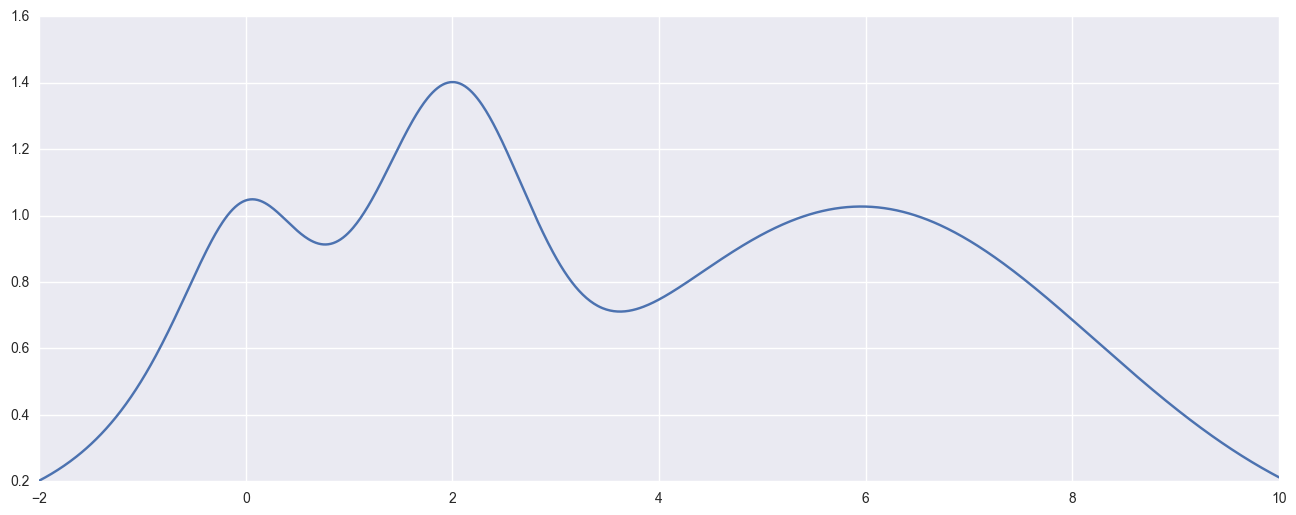

In [3]:
x = np.linspace(-2, 10, 1000)
y = target(x)
plt.figure(figsize=[16,6])
plt.plot(x, y)

# Optimization algorithms

Let us define the optimization objectives and frameworks for each of the optimization methods.

## `hyperopt`: Random Search and TPE

Let us start with `hyperopt` implementing **Random Search** and **Tree of Parzen Estimators**. We have to make a small modification to the target function for it to work. 

In [4]:
def target_hyperopt(space):
    return {'loss': -target(space['x']),
            'x': space['x'],
            'status': STATUS_OK
            }

Now we have to define the search space, which is just the interval between -2 and 10.

In [5]:
space = {'x': hp.uniform('x',-2,10)}

Finally, the optimization function. Let us do **Random Search** first.

In [6]:
# object that is going to carry trial information
trials = Trials()

# parameters of optim function
evals = 100
algo = rand.suggest 

# minimization function
fmin(target_hyperopt, space, algo=algo, trials=trials, max_evals=evals)

{'x': 2.1337355392168984}

Let us plot the results.

In [7]:
# extracting trials
x_trials = [e['result']['x'] for e in trials.trials]
loss_trials = [-e['result']['loss'] for e in trials.trials]

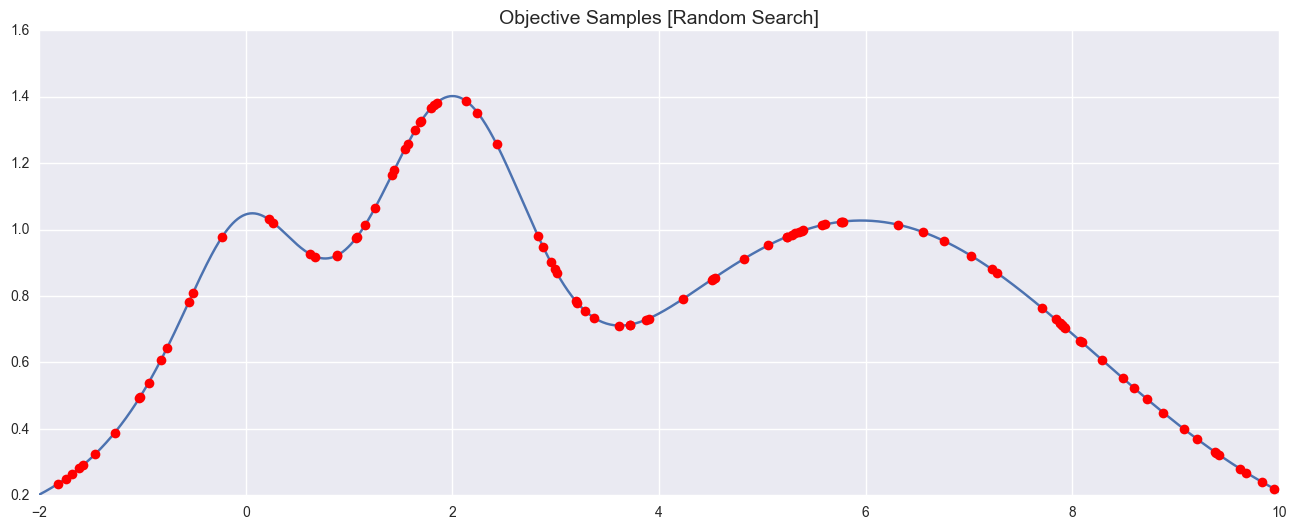

In [8]:
# plotting the samples 
plt.figure(figsize=[16,6])
plt.plot(x, y)
plt.plot(x_trials, loss_trials, 'ro')
plt.title('Objective Samples [Random Search]', fontsize=14)

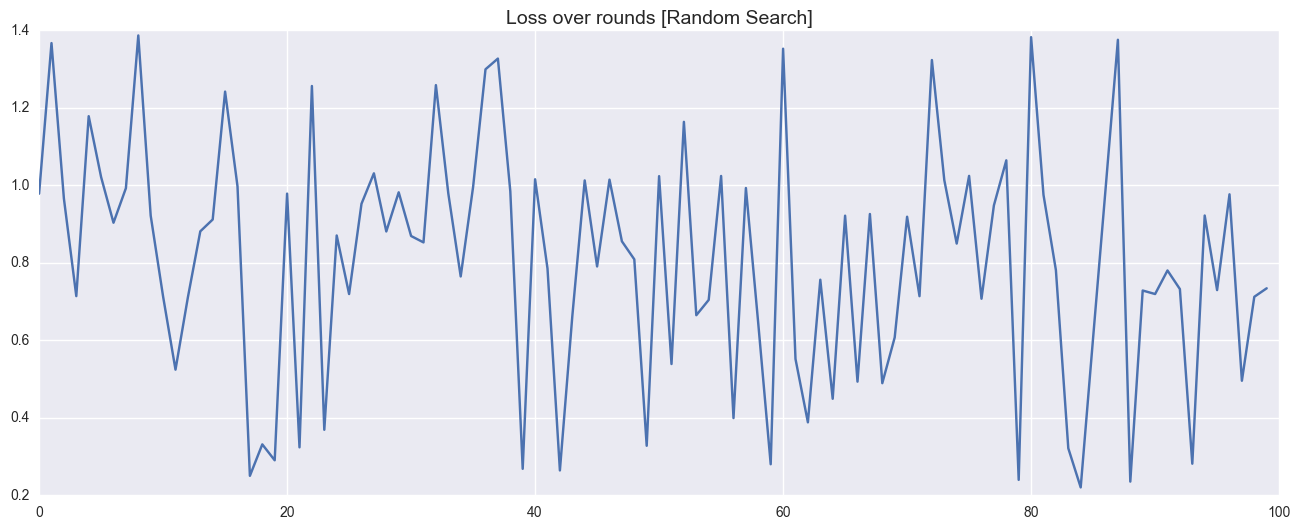

In [9]:
plt.figure(figsize=[16,6])
plt.plot(loss_trials)
plt.title('Loss over rounds [Random Search]', fontsize=14)

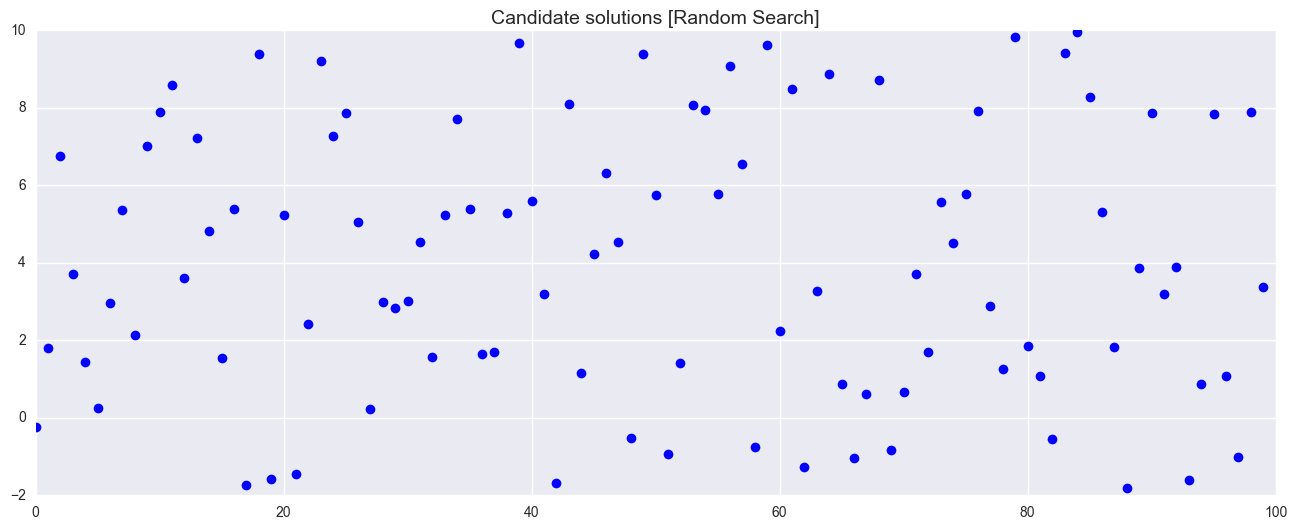

In [10]:
plt.figure(figsize=[16,6])
plt.plot(x_trials, 'bo')
plt.title('Candidate solutions [Random Search]',fontsize=14)

Let us try **TPE** now.

In [11]:
# object that is going to carry trial information
trials = Trials()

# parameters of optim function
evals = 100
algo = tpe.suggest 

# minimization function
fmin(target_hyperopt, space, algo=algo, trials=trials, max_evals=evals)

{'x': 2.0019367733651854}

In [12]:
# extracting trials
x_trials = [e['result']['x'] for e in trials.trials]
loss_trials = [-e['result']['loss'] for e in trials.trials]

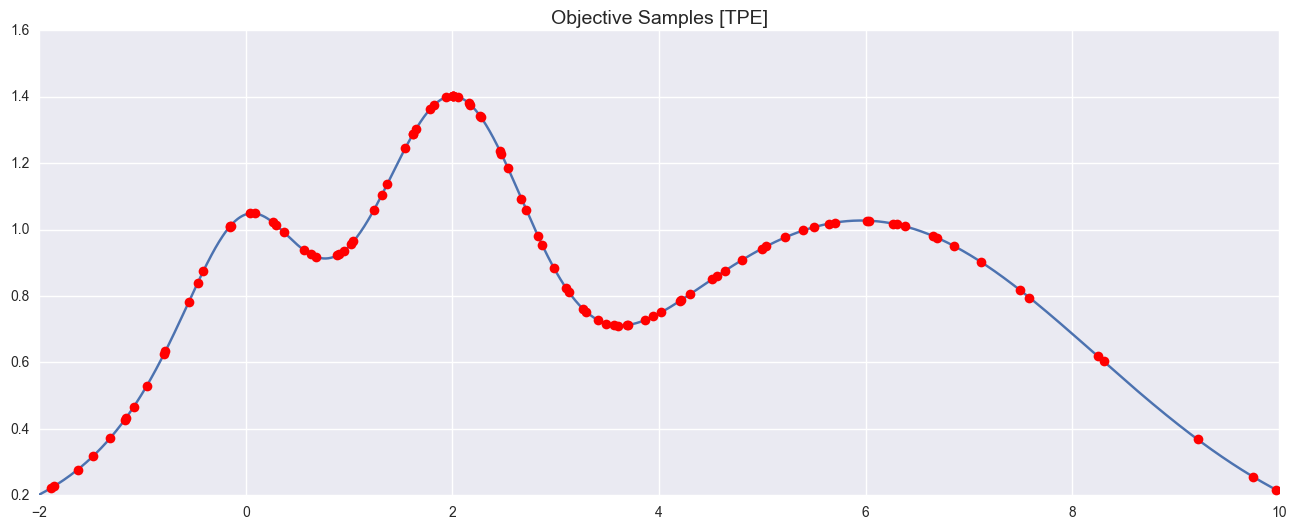

In [13]:
# plotting the samples 
plt.figure(figsize=[16,6])
plt.plot(x, y)
plt.plot(x_trials, loss_trials, 'ro')
plt.title('Objective Samples [TPE]', fontsize=14)

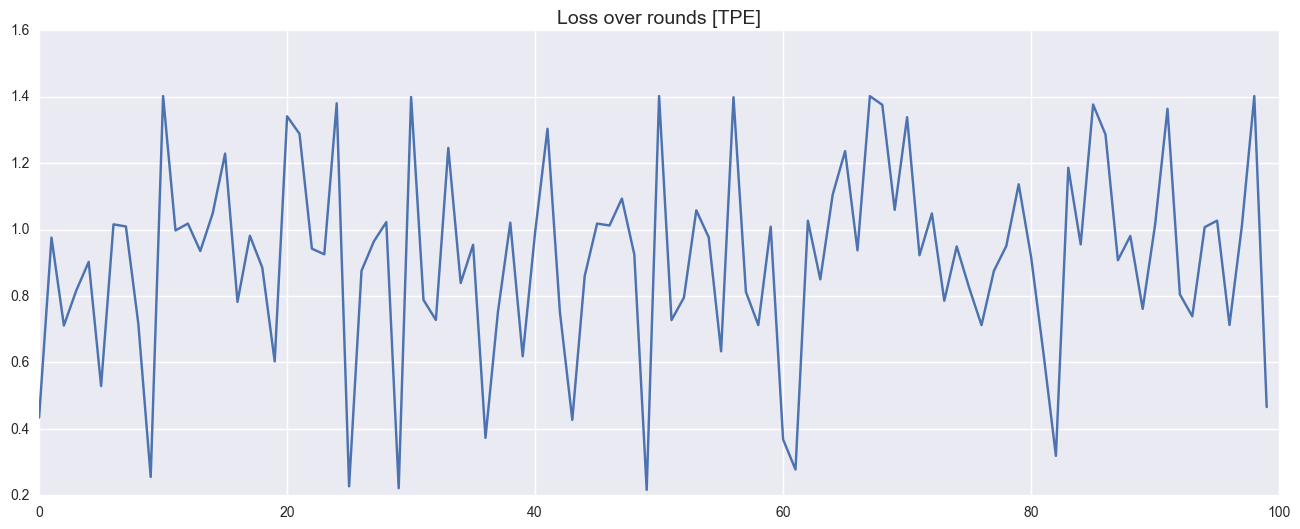

In [14]:
plt.figure(figsize=[16,6])
plt.plot(loss_trials)
plt.title('Loss over rounds [TPE]', fontsize=14)

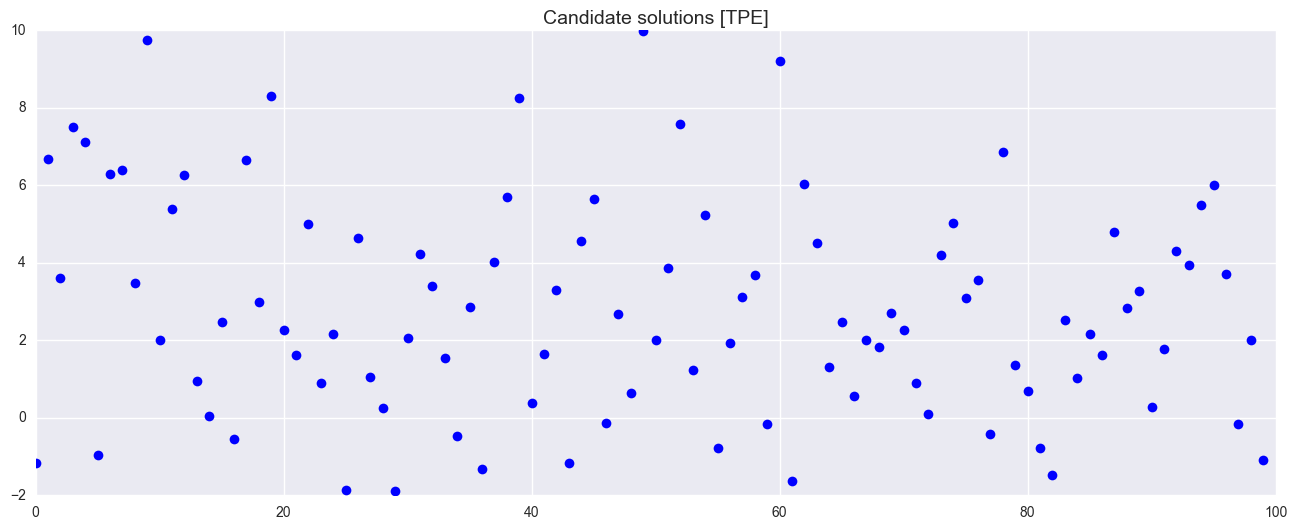

In [15]:
plt.figure(figsize=[16,6])
plt.plot(x_trials, 'bo')
plt.title('Candidate solutions [TPE]',fontsize=14)

**TPE** does explore less the unpromising areas of the function than **Random Search**, and it looks like it changes its behavior in steps of 20 samples. being more focused as time passes. Let us move to **SMAC**!

## `pysmac`: SMAC

`pysmac` is a Python wrapper for the Sequential Model-based Algorithm Configuration [library](http://www.cs.ubc.ca/labs/beta/Projects/SMAC/). It works roughly the same way as the previous algortihms. We need to define search bounds and a initial point for each parameter (in our case it's only `x`).

In [16]:
# module
import pysmac

# initial point and search space
init_x = random.uniform(-2,10)
space = {'x': ('real', [-2, 10], init_x)}

ImportError: No module named resource

Next we define the optimization function and run.

In [ ]:
# optim object
opt = pysmac.SMAC_optimizer(working_directory='output/smac')

# target for SMAC
def target_smac(x):
    return(-target(x))

# minimizing
value, space = opt.minimize(target_smac, 100, space)

Let us visualize! It is a bit more complicated to get the trials from SMAC, as it is saved in a output file.

In [ ]:
# reading SMAC trials file
smac_trials = pd.read_csv('output/smac/out/scenario/state-run0/runs_and_results-it36.csv')

# reading parameter trials
from pysmac.utils.smac_output_readers import read_paramstrings_file
param_trials = read_paramstrings_file('output/smac/out/scenario/state-run0/paramstrings-it36.txt')
x_trials = [float(e['x']) for e in param_trials]

In [ ]:
# plotting the samples 
plt.figure(figsize=[16,6])
plt.plot(x, y)
plt.plot(x_trials, -smac_trials['Response Value (y)'], 'ro')
plt.title('Objective Samples [SMAC]', fontsize=14)

In [ ]:
plt.figure(figsize=[16,6])
plt.plot(-smac_trials['Response Value (y)'])
plt.title('Loss over rounds [SMAC]', fontsize=14)

In [ ]:
plt.figure(figsize=[16,6])
plt.plot(x_trials, 'bo')
plt.title('Candidate solutions [SMAC]',fontsize=14)

**SMAC** does more exploration around local (and global) maxima. It was very effective. Now, to the last method, **Gaussian Processes**!

## `BayesianOptimization`: Gaussian Processes

With `BayesianOptimization` we can use Gaussian Processes to optimize functions. The first thing we need to do is define search bounds for the algorithm.

In [18]:
# importing
from bayes_opt import BayesianOptimization

# defining bounds
bounds = {'x': (-2, 10)}

Then, we create the optimization task.

In [19]:
bo = BayesianOptimization(target, bounds, verbose=0)

And finally define the optimization parameters and execute.

In [23]:
bo.maximize(init_points=2, n_iter=30, acq='ucb', kappa=5)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
C:\Program Files\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.78465678e-05]), 'nit': 6, 'funcalls': 60}
  " state: %s" % convergence_dict)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  8.48005244e-05]), 'nit': 4, 'funcalls': 53}
  " state: %s" % convergence_dict)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMA

Let's visualize!

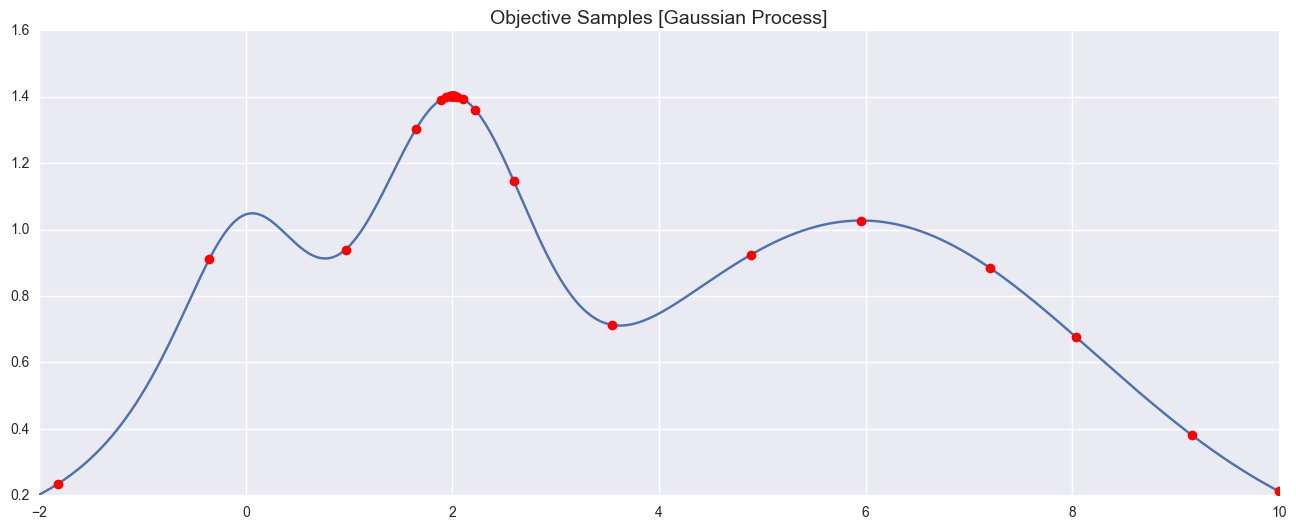

In [24]:
# plotting the samples 
plt.figure(figsize=[16,6])
plt.plot(x, y)
plt.plot(bo.X, bo.Y, 'ro')
plt.title('Objective Samples [Gaussian Process]', fontsize=14)

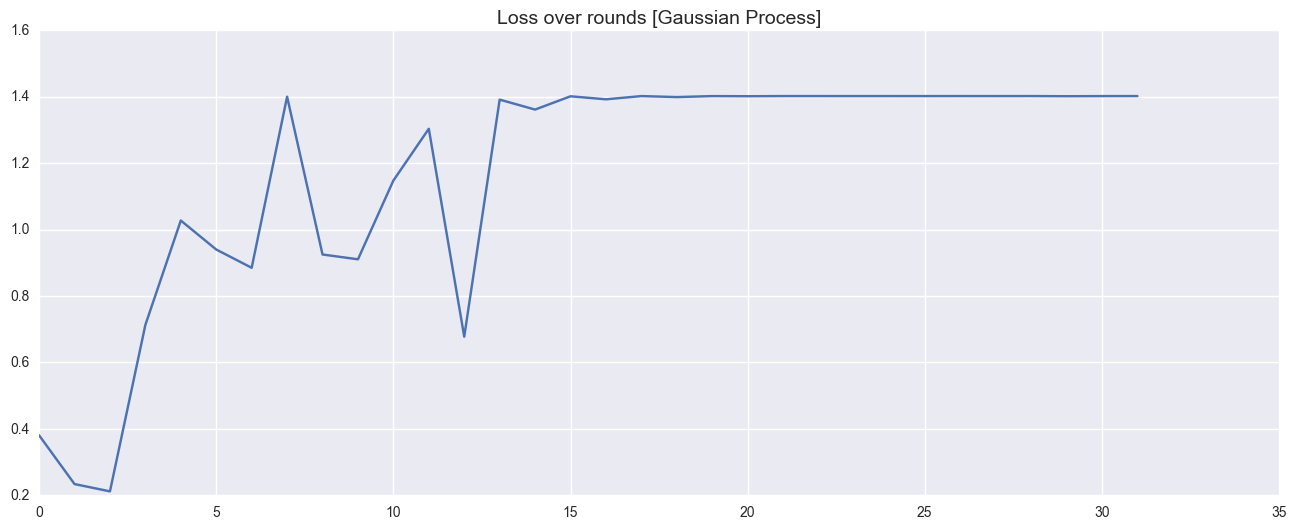

In [25]:
plt.figure(figsize=[16,6])
plt.plot(bo.Y)
plt.title('Loss over rounds [Gaussian Process]', fontsize=14)

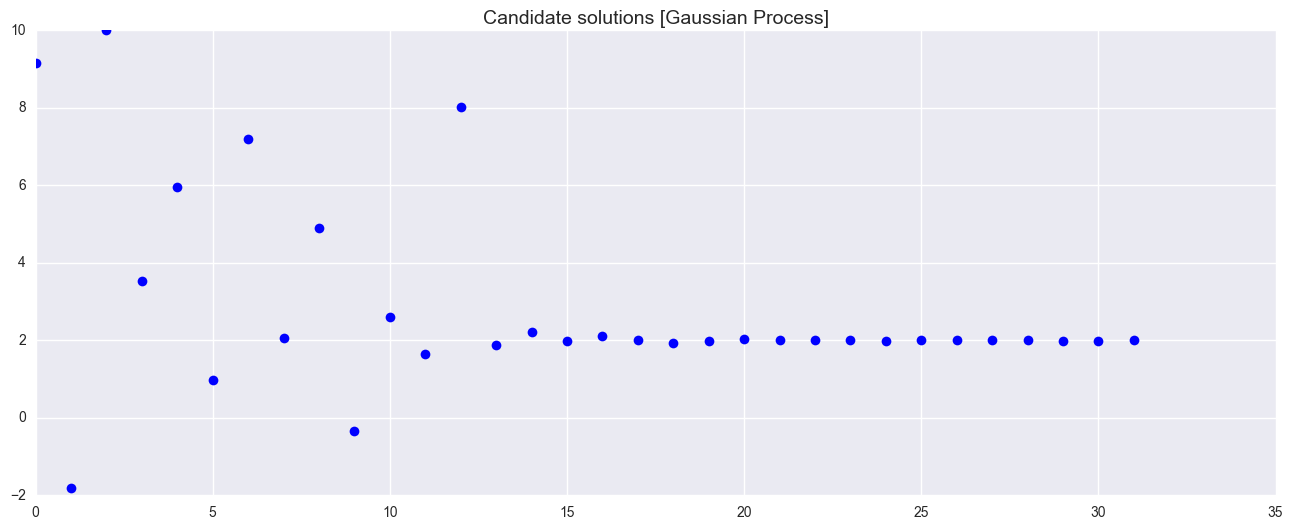

In [26]:
plt.figure(figsize=[16,6])
plt.plot(bo.X, 'bo')
plt.title('Candidate solutions [Gaussian Process]',fontsize=14)

Remarkable! **GP's** do estimate very well the target function. Let us see the function it came up with.

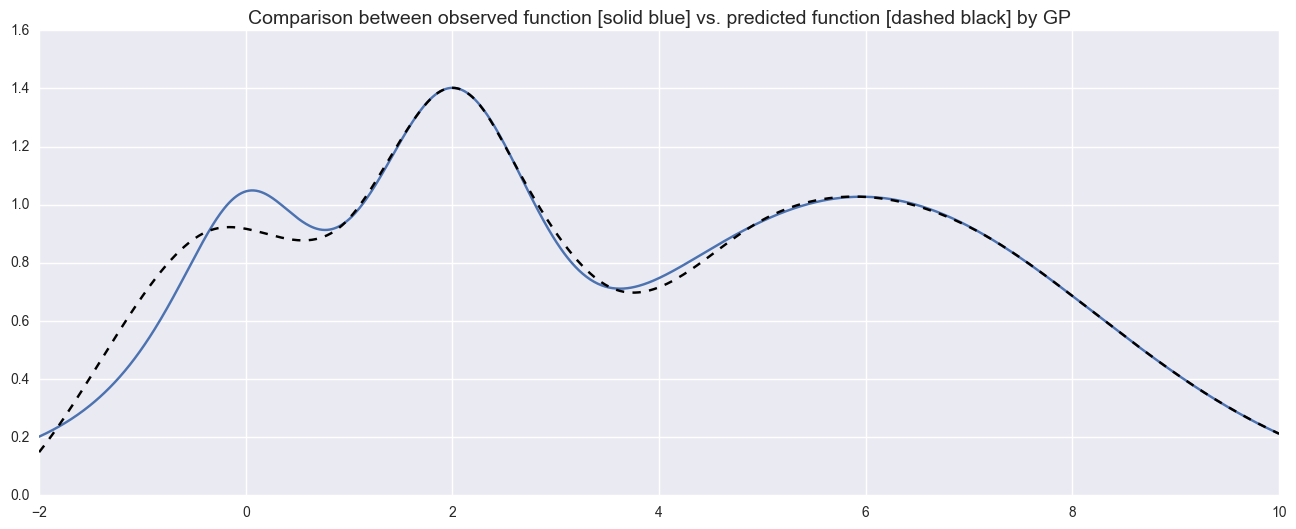

In [27]:
# GP fit of target function
target_gp = bo.gp.predict(np.transpose(np.matrix(x)))

# plotting the samples 
plt.figure(figsize=[16,6])
plt.plot(x, y)
plt.plot(x, target_gp, 'k--')
plt.title('Comparison between observed function [solid blue] vs. predicted function [dashed black] by GP', fontsize=14)

This ends our initial test! 